## Логистическая регрессия (2D)
```
Сгенерируйте два синтетических набора точек на плоскости, добавьте им метки классов (2
класса). Визуализируйте множества (matplotlib). Разделите данные на тренировочный и
тестовый набор. Реализуйте логистическую регрессию. Проверьте точность полученного
алгоритма с помощью метрики accuracy (на тестовом множестве).
````

In [1]:
import numpy as np

In [4]:
labels = np.random.randint(0, 2, 100)
noise = 0.9
x = (np.random.rand(100) + labels) / 2
y = x + np.random.rand(100) * noise

x = x.reshape(-1, 1)
y = y.reshape(-1, 1)
labels = labels.reshape(-1, 1)
data= np.hstack([np.ones_like(x),x,y,labels])

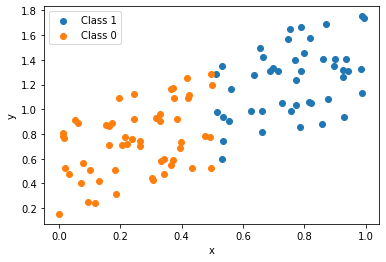

In [5]:
import matplotlib.pyplot as plt
plt.scatter(data[:,1][data[:,3] ==1], data[:,2][data[:,3] ==1], label='Class 1')
plt.scatter(data[:,1][data[:,3] ==0], data[:,2][data[:,3] ==0], label='Class 0')
plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.show()

### Spliting data to test and train

In [6]:
np.random.shuffle(data)
train_x,train_y = data[:,[0,1,2]][:70],data[:,3][:70]
test_x,test_y = data[:,[0,1,2]][70:],data[:,3][70:]

In [7]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [40]:
def log_reg(X,y):
    learning_rate=0.01
    n_iters=5000
    n_samples, n_features = X.shape
    weights = np.zeros(n_features)
    for i in range(n_iters):
        y_predicted = sigmoid(X @ weights)        
        weights = weights - (learning_rate / n_samples) * (X.T @ (y_predicted - y) )

    return weights

In [41]:
def predict(X, weights):
    y_predicted = sigmoid(np.dot(X, weights))
    predicted_labels = np.array([1 if i > 0.5 else 0 for i in y_predicted])
    return predicted_labels

In [42]:
def accuracy(y_true, y_pred):
    return np.sum(y_true == y_pred) / len(y_true)

In [43]:
weights = log_reg(train_x,train_y)
#test_y_predicted = predict(test_x,weights)

In [45]:
accuracy(test_y,predict(test_x,weights))

0.9333333333333333

In [46]:
weights

array([-2.55908085,  2.70348474,  1.5683811 ])

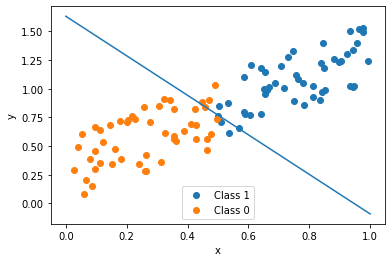

In [47]:
x = np.linspace(0,1, 15)

c,a,b = weights# weights

y = -(a*x+c)/b
plt.scatter(data[:,1][data[:,3] ==1], data[:,2][data[:,3] ==1], label='Class 1')
plt.scatter(data[:,1][data[:,3] ==0], data[:,2][data[:,3] ==0], label='Class 0')
plt.plot(x,y)
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## Using sklearn

In [48]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression().fit(train_x[:,1:], train_y)
clf.predict(test_x[:,1:])

array([0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1.,
       1., 0., 1., 0., 1., 0., 0., 1., 0., 1., 1., 1., 1.])

In [49]:
clf.coef_, clf.intercept_

(array([[2.982198  , 2.26740608]]), array([-3.48137944]))

In [50]:
clf.score(test_x[:,1:], test_y)

0.9

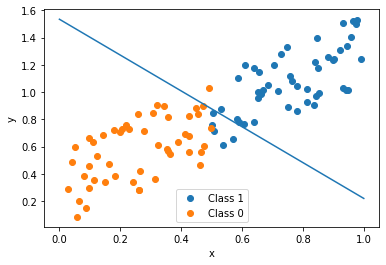

In [51]:
x = np.linspace(0,1, 15)

c =  clf.intercept_
a,b = clf.coef_[0]

y = -(a*x+c)/b
plt.scatter(data[:,1][data[:,3] ==1], data[:,2][data[:,3] ==1], label='Class 1')
plt.scatter(data[:,1][data[:,3] ==0], data[:,2][data[:,3] ==0], label='Class 0')
plt.plot(x,y)
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.show()